## Decission Tree Classifier Implmentation with Post prunning and pre prunning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
from sklearn.datasets import load_iris


In [ ]:
dataset= load_iris()

In [ ]:
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
import seaborn as sns
df= sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Independent and dependent features
X=df.iloc[:,:-1]
y= dataset.target

In [ ]:
X,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
### train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.33,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier= DecisionTreeClassifier(criterion='entropy')


In [ ]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0


[Text(0.4444444444444444, 0.9285714285714286, 'x[2] <= 2.45\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.3333333333333333, 0.7857142857142857, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5555555555555556, 0.7857142857142857, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.3333333333333333, 0.6428571428571429, 'x[2] <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.2222222222222222, 0.5, 'x[3] <= 1.45\nentropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.1111111111111111, 0.35714285714285715, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(0.3333333333333333, 0.35714285714285715, 'x[1] <= 2.6\nentropy = 0.722\nsamples = 10\nvalue = [0, 8, 2]'),
 Text(0.2222222222222222, 0.21428571428571427, 'x[0] <= 6.15\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.1111111111111111, 0.07142857142857142, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.3333333333333333, 0.0714285714

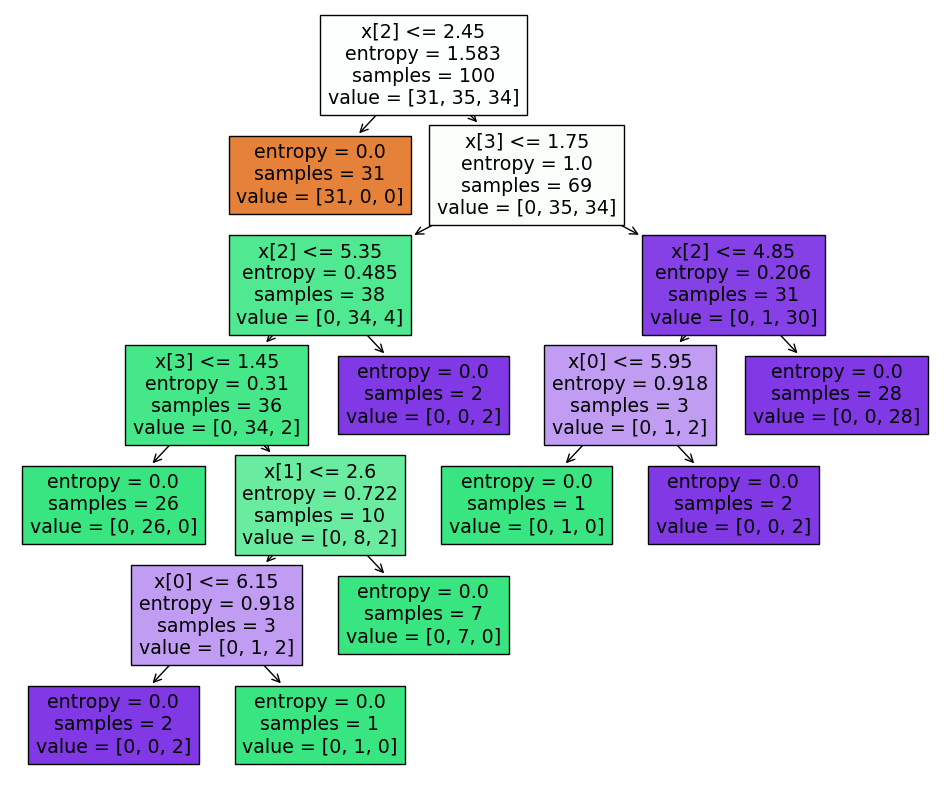

In [ ]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)

In [ ]:
## post prunning
classifier= DecisionTreeClassifier(criterion='entropy',max_depth=2)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.206\nsamples = 31\nvalue = [0, 1, 30]')]

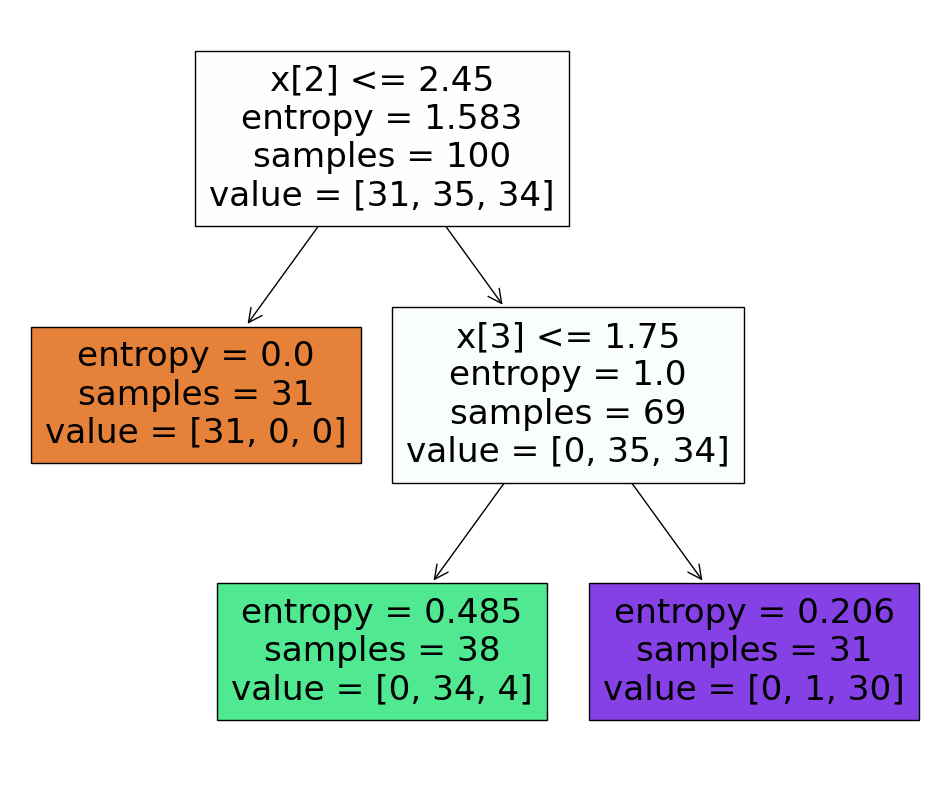

In [ ]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier, filled= True)

In [ ]:
## Prediction
y_pred= classifier.predict(X_test)

In [ ]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
score= accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## Decision Tree Preprunng And Hyperparameter Tunning For Huge Data

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
classifier= DecisionTreeClassifier()
clf= GridSearchCV(classifier,param_grid=parameter, cv=5,scoring='accuracy')

In [ ]:
classifier, clf

(DecisionTreeClassifier(),
 GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
              param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [1, 2, 3, 4, 5],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'splitter': ['best', 'random']},
              scoring='accuracy'))

In [ ]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
clf.best_params_

{'criterion': 'log_loss',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [ ]:
y_pred= clf.predict(X_test)

In [ ]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.88      0.94        17
           2       0.88      1.00      0.93        14

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



## Decision Tree Regressor Implmentation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
## Californiya House Pricing Dataset
from sklearn.datasets import fetch_california_housing
california_df= fetch_california_housing()

In [5]:
california_df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
df= pd.DataFrame(california_df.data,columns= california_df.feature_names)
df['Target']=california_df.target

In [7]:
df.shape

(20640, 9)

In [8]:
## Taking Sample Data
df=df.sample(frac=0.25)

In [9]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
11712,2.9125,32.0,8.057416,1.717703,454.0,2.172249,39.17,-120.15,1.458
6608,3.7222,49.0,5.846690,0.965157,737.0,2.567944,34.19,-118.14,2.370
11283,2.0677,29.0,3.761411,1.039419,1170.0,2.427386,33.79,-117.96,2.145
9203,2.8393,15.0,5.427403,1.083845,1267.0,2.591002,37.31,-119.64,1.044
10118,5.5830,27.0,6.876506,0.933735,2045.0,3.079819,33.94,-117.92,2.677
...,...,...,...,...,...,...,...,...,...
18717,3.4464,5.0,6.360097,1.053528,1275.0,3.102190,40.60,-122.42,1.229
9290,3.4432,16.0,5.264085,1.028169,472.0,1.661972,38.01,-122.53,0.675
5410,6.2583,37.0,4.959502,0.959502,783.0,2.439252,34.02,-118.44,3.860
13809,2.1056,34.0,4.260194,1.007767,1326.0,2.574757,34.90,-117.01,0.720


In [10]:
df.shape

(5160, 9)

In [11]:
#independent features
X= df.iloc[:,:-1]
# Dependent features
y= df.iloc[:,-1]

In [12]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
11712,2.9125,32.0,8.057416,1.717703,454.0,2.172249,39.17,-120.15
6608,3.7222,49.0,5.846690,0.965157,737.0,2.567944,34.19,-118.14
11283,2.0677,29.0,3.761411,1.039419,1170.0,2.427386,33.79,-117.96
9203,2.8393,15.0,5.427403,1.083845,1267.0,2.591002,37.31,-119.64
10118,5.5830,27.0,6.876506,0.933735,2045.0,3.079819,33.94,-117.92


In [13]:
### Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(
    X,y, test_size=0.33,random_state=42
)

In [15]:
from sklearn.tree import DecisionTreeRegressor
regressor= DecisionTreeRegressor()

In [16]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [17]:
y_pred= regressor.predict(X_test)

In [18]:
y_pred

array([1.25 , 2.25 , 1.402, ..., 1.532, 1.689, 4.443])

In [19]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)

In [20]:
score

0.5400397203048651

In [21]:
## Hyperparameter Tunning
parameter={
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['auto', 'sqrt', 'log2']

}
regressor=DecisionTreeRegressor()

In [22]:
#https://scikit-learn.org/stable/modules/model_evaluation.html
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
regressorcv=GridSearchCV(regressor,param_grid=parameter,cv=2,scoring='neg_mean_squared_error')

In [23]:
regressorcv.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [24]:
regressorcv.best_params_

{'criterion': 'squared_error',
 'max_depth': 7,
 'max_features': 'auto',
 'splitter': 'best'}

In [25]:
regressor=DecisionTreeRegressor(criterion='absolute_error',max_depth=7,max_features='auto',splitter='best')

In [26]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      max_features='auto')

In [27]:
%matplotlib inline

[Text(0.5709302325581396, 0.9375, 'x[0] <= 5.32\nabsolute_error = 0.871\nsamples = 3457\nvalue = 1.75'),
 Text(0.29767441860465116, 0.8125, 'x[0] <= 3.074\nabsolute_error = 0.671\nsamples = 2862\nvalue = 1.571'),
 Text(0.14883720930232558, 0.6875, 'x[2] <= 4.162\nabsolute_error = 0.501\nsamples = 1348\nvalue = 1.161'),
 Text(0.07441860465116279, 0.5625, 'x[5] <= 2.935\nabsolute_error = 0.559\nsamples = 491\nvalue = 1.506'),
 Text(0.037209302325581395, 0.4375, 'x[6] <= 37.9\nabsolute_error = 0.658\nsamples = 222\nvalue = 1.818'),
 Text(0.018604651162790697, 0.3125, 'x[7] <= -122.32\nabsolute_error = 0.656\nsamples = 192\nvalue = 1.875'),
 Text(0.009302325581395349, 0.1875, 'x[5] <= 1.713\nabsolute_error = 0.665\nsamples = 13\nvalue = 3.5'),
 Text(0.004651162790697674, 0.0625, 'absolute_error = 0.042\nsamples = 2\nvalue = 4.542'),
 Text(0.013953488372093023, 0.0625, 'absolute_error = 0.593\nsamples = 11\nvalue = 3.462'),
 Text(0.027906976744186046, 0.1875, 'x[7] <= -117.225\nabsolute_err

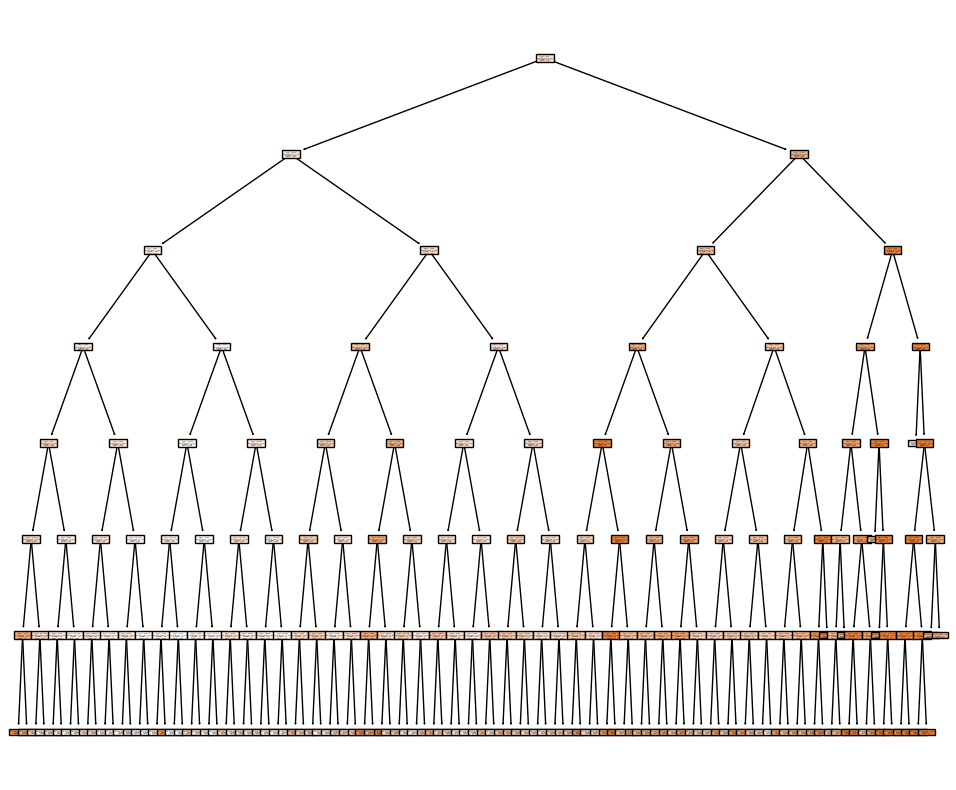

In [28]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(regressor,filled=True)
plt.show()

In [29]:
y_pred=regressorcv.predict(X_test)

In [30]:
r2_score(y_pred,y_test)

0.5453341871305796